<center><h1><b>Practice 01: MORPHOLOGICAL OPERATIONS</b></h1></center>

- Full name: Võ Nguyễn Hoàng Kim
- Student ID: 21127090

In [1]:
# import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# display images to compare
def plotImg(orgImg, myImg, libImg, t1="Original", t2="Mine", t3 = "OpenCV"):
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust(wspace=1)

    plt.subplot(1, 3, 1)
    plt.title(t1)
    plt.imshow(orgImg, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title(t2)
    plt.imshow(myImg, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title(t3)
    plt.imshow(libImg, cmap='gray')
    plt.show()


<h2><b>1. Morphological operations with binary image</b></h2>

- Read image and convert it to a binary image
- Define a kernel 3x3

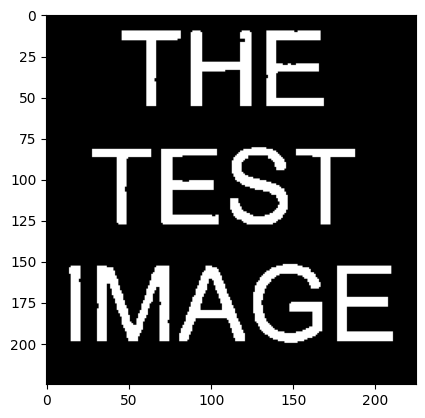

In [3]:
# read image in data folder
grayImg = cv.imread("../data/words.png", 0)

# convert to binary image by using auto-calculate threshold
(thres, img) = cv.threshold(grayImg, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

# show the binary image 
plt.imshow(img, cmap= 'gray')

# define a kernel 
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))

<h3><b>a. Binary Erosion</b></h3>

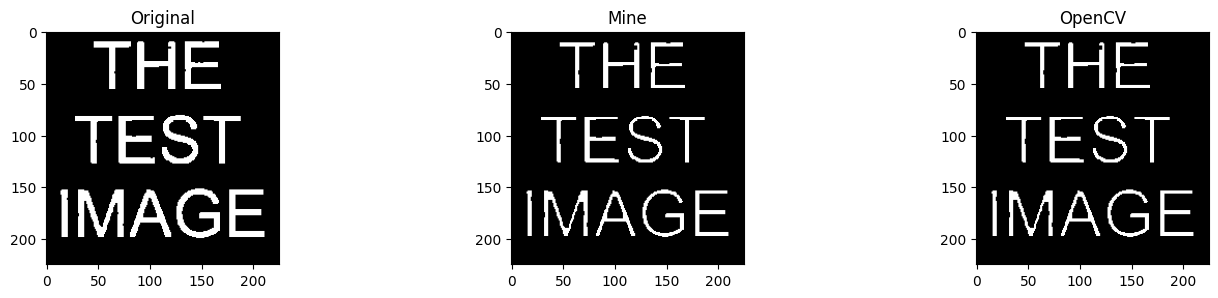

In [4]:
def erosionOperator_binary(inputImg, kernel):
    
    imgShape = inputImg.shape
    kernel_ones_count = kernel.sum() 
    
    # compute the pads along rows and cols 
    numPads = [kernel.shape[0] // 2, kernel.shape[1] // 2]
        
    # init a result image with the same shape of the input   
    erodedImg = np.zeros(img.shape)
    
    # add padding for the input image based on number of computed pads
    inputImg = np.pad(inputImg, numPads, mode="edge")

    # access each element to apply the erosion binary operator
    for i in range(imgShape[0]):
        for j in range(imgShape[1]):
            # get the bounds of neighboring elements
            i_ = i + kernel.shape[0]
            j_ = j + kernel.shape[1]
            # if all neighboring elements are in the same position as the kernel when apply it on 
            if(kernel_ones_count == (kernel * inputImg[i: i_, j: j_]).sum() / 255):
                # accept this element and set its value to 255 
                erodedImg[i,j] = 255;
    return erodedImg

# my eroded image 
myImg = erosionOperator_binary(img, kernel)

# library's image
img_lib = cv.erode(img, kernel)

plotImg(img, myImg, img_lib)


<h3><b>b. Binary Dilation </b></h3>


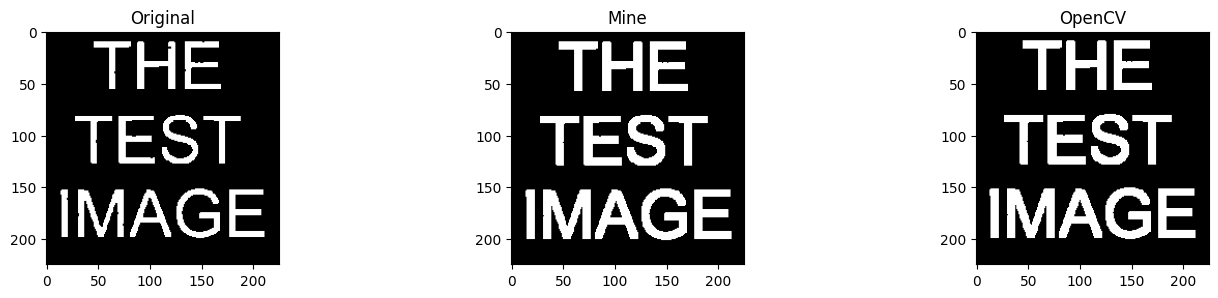

In [5]:
def dilationOperator_binary(inputImg, kernel):
    imgShape = inputImg.shape
    
    # compute the pads along rows and cols 
    numPads = [kernel.shape[0] // 2, kernel.shape[1] // 2]
        
    # init a result image with the same shape of the input   
    dilatedImg = np.zeros(img.shape)
    
    # add padding for the input image based on number of computed pads
    inputImg = np.pad(inputImg, numPads, mode="edge")

   # access each element to apply the erosion binary operator
    for i in range(imgShape[0]):
        for j in range(imgShape[1]):
            # get the bounds of neighboring elements
            i_ = i + kernel.shape[0]
            j_ = j + kernel.shape[1]
            # when apply the kernel on, the element of input image that has the same position with the kernel center equal 255
            if(inputImg[i + numPads[0], j + numPads[1]] == 255):
                # accept this element and set its neigbors value to 255
                dilatedImg[i: i_,j: j_] = 255;
    return dilatedImg

myImg = dilationOperator_binary(img, kernel)

libImg = cv.dilate(img, kernel)

plotImg(img, myImg, libImg)


<h3><b>c. Binary Opening </b></h3>


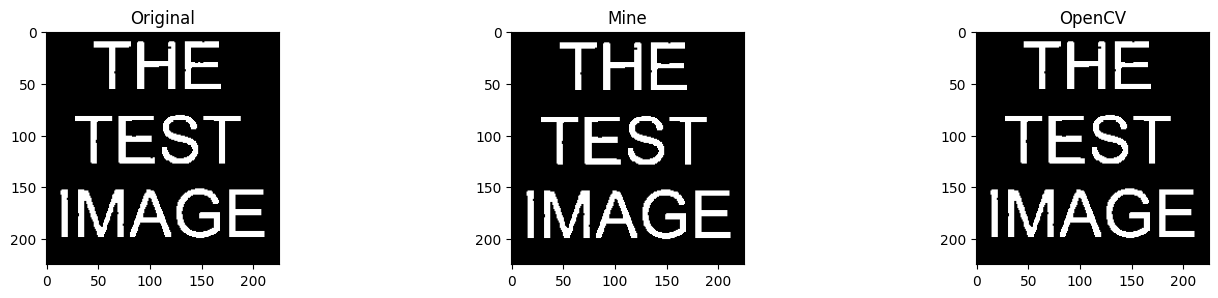

In [6]:
# Opening
def openingOperator_binary(inputImg, kernel):
    # compute the erosion 
    erosion = erosionOperator_binary(inputImg, kernel)
    # compute the dilation based on the erosion result above
    dilation = dilationOperator_binary(erosion, kernel)
    return dilation


myImg = openingOperator_binary(img, kernel)

libImg = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plotImg(img, myImg, libImg)


<h3><b>d. Binary Closing </b></h3>


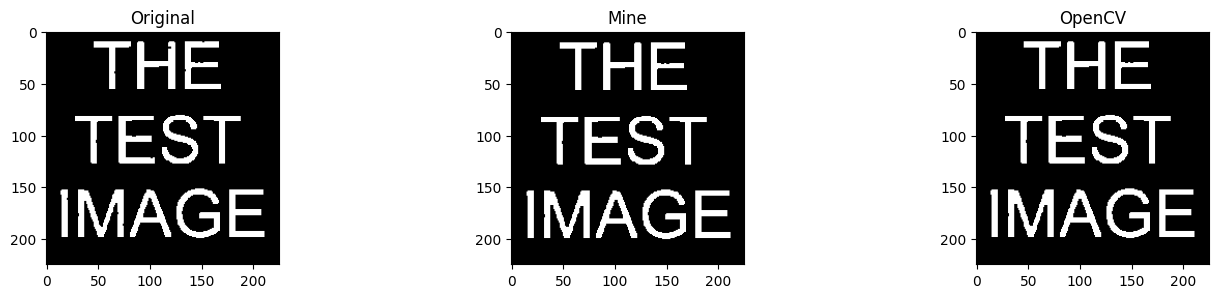

In [7]:
# CLosing
def closingOperator_binary(inputImg, kernel):
    # compute the dilation
    dilation = dilationOperator_binary(inputImg, kernel)
    # compute the erosion based on the erosion result above
    erosion = erosionOperator_binary(dilation, kernel)
    return erosion


myImg = closingOperator_binary(img, kernel)

libImg = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plotImg(img, myImg, libImg)
    

<h3><b>e. Boundary Extraction </b></h3>


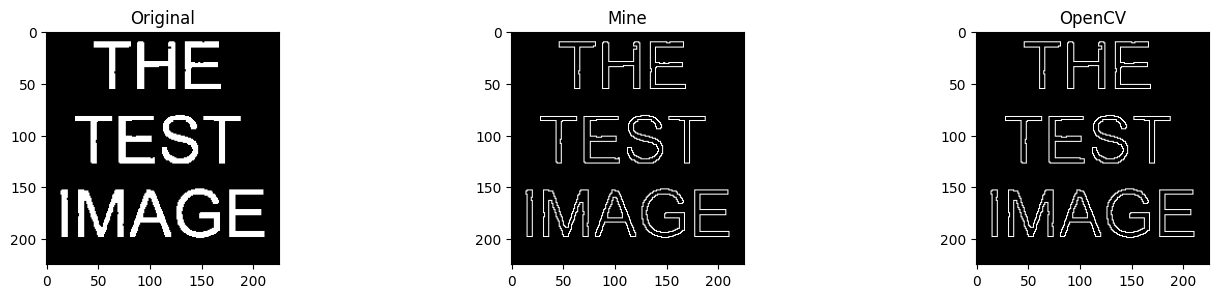

In [8]:
# boundary extraction
def boundaryExtraction(img, kernel):
    # compute the erosion
    erosion = erosionOperator_binary(img, kernel)
    # compute the difference
    result = img - erosion
    return result

myImg = boundaryExtraction(img, kernel)

# Erosion followed by dilation to extract boundary
erosion = cv.erode(img, kernel, iterations=1)
dilation = cv.dilate(erosion, kernel, iterations=1)

# Boundary extraction
libImg = cv.absdiff(dilation, erosion)


plotImg(img, myImg, libImg)


<h2><b>2. Morphological Operations With Grayscale Image </b></h2>

In [9]:
# read img
# Lenna image 
originalImg = cv.imread("../data/lenna.png")
img = cv.cvtColor(originalImg, cv.COLOR_BGR2GRAY)

# a image with heavy noise
originalImg = cv.imread("../data/noise.jpg")
noiseImg = cv.cvtColor(originalImg, cv.COLOR_BGR2GRAY)

<h3><b>a. Grayscale Dilation </b></h3>

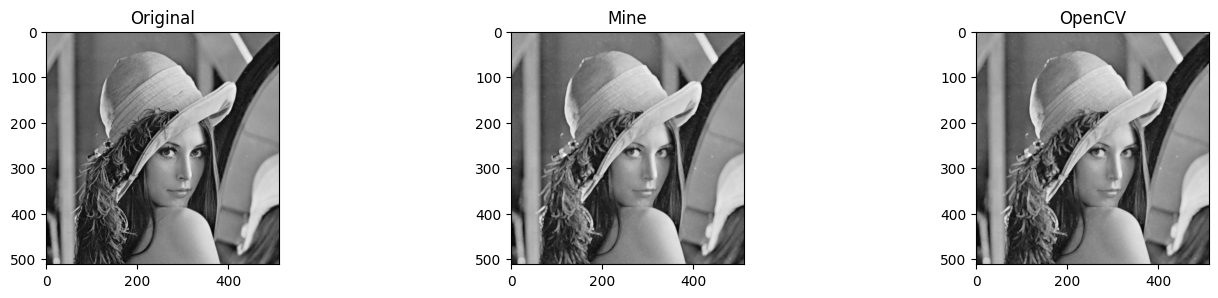

In [10]:
# Dilation
def dilationOperator(inputImg, kernel):
    
    # compute the number of paddings 
    numPads = [kernel.shape[0] // 2, kernel.shape[1] // 2]
    
    imgShape = inputImg.shape
    # init the result image 
    dilatedImg = np.zeros(imgShape)
    inputImg = np.pad(inputImg, numPads, mode="edge")

    for i in range(imgShape[0]):
        for j in range(imgShape[1]):
            i_ = i + kernel.shape[0]
            j_ = j + kernel.shape[1]
            # get the max value in neighbored area
            max = np.max(inputImg[i: i_, j: j_] * kernel)
            # set the max value for 
            dilatedImg[i, j] = max
    return dilatedImg[:imgShape[0], :imgShape[1]]

    
myImg = dilationOperator(img, kernel)
libImg = cv.dilate(img, kernel)
plotImg(img, myImg, libImg)

<h3><b>b. Grayscale Erosion </b></h3>

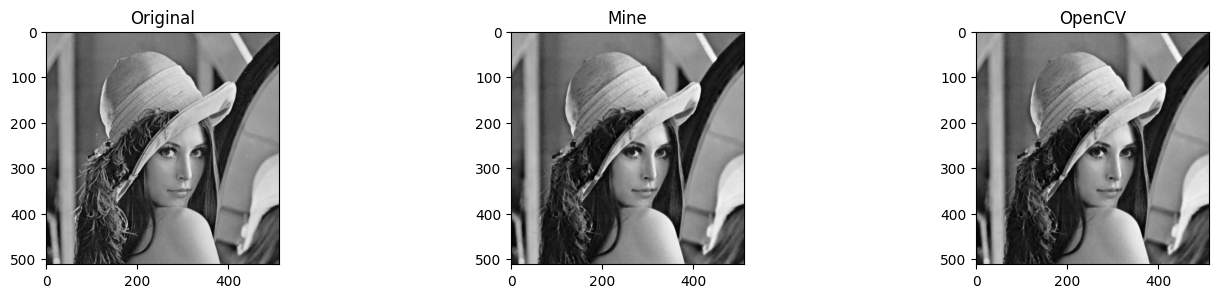

In [11]:
def erosionOperator(inputImg, kernel):
    # compute the number of paddings 
    numPads = [kernel.shape[0] // 2, kernel.shape[1] // 2]
    
    imgShape = inputImg.shape
    # init the result image
    erodedImg = np.zeros(imgShape)
    inputImg = np.pad(inputImg, numPads, mode="edge")

    for i in range(imgShape[0]):
        for j in range(imgShape[1]):
            i_ = i + kernel.shape[0]
            j_ = j + kernel.shape[1]
            # get the min value in neighbored area
            min = np.min(inputImg[i: i_, j: j_] * kernel)
            erodedImg[i, j] = min
            
    return erodedImg[:imgShape[0], :imgShape[1]]

myImg = erosionOperator(img, kernel)
libImg = cv.erode(img, kernel)
plotImg(img, myImg, libImg)

<h3><b>c. Grayscale Opening </b></h3>


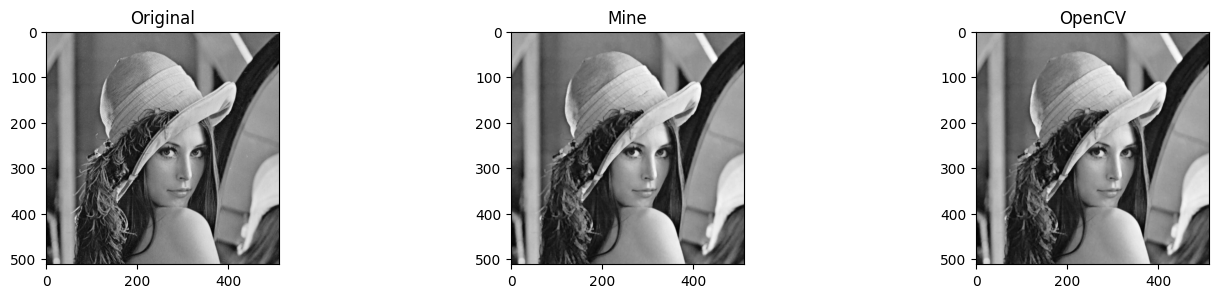

In [12]:
def openingOperator(inputImg, kernel):
    # compute the erosion
    erosion = erosionOperator(inputImg, kernel)
    # compute the dilation
    result = dilationOperator(erosion, kernel)
    return result


myImg = openingOperator(img, kernel)
libImg = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plotImg(img, myImg, libImg)

<h3><b>d. Grayscale Closing </b></h3>


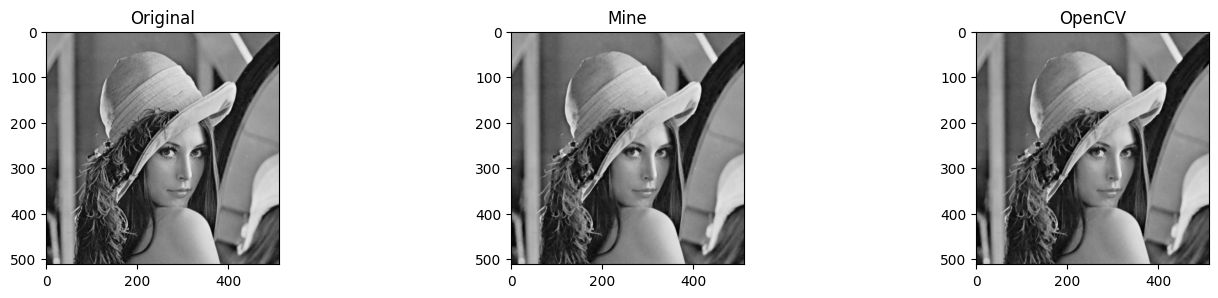

In [13]:
def closingOperator(inputImg, kernel):
    # compute the dilation
    dilation = dilationOperator(inputImg, kernel)
    # compute the erosion
    result = erosionOperator(dilation, kernel)
    return result


myImg = closingOperator(img, kernel)
libImg = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plotImg(img, myImg, libImg)

<h3><b>e. Morphological Gradient </b></h3>


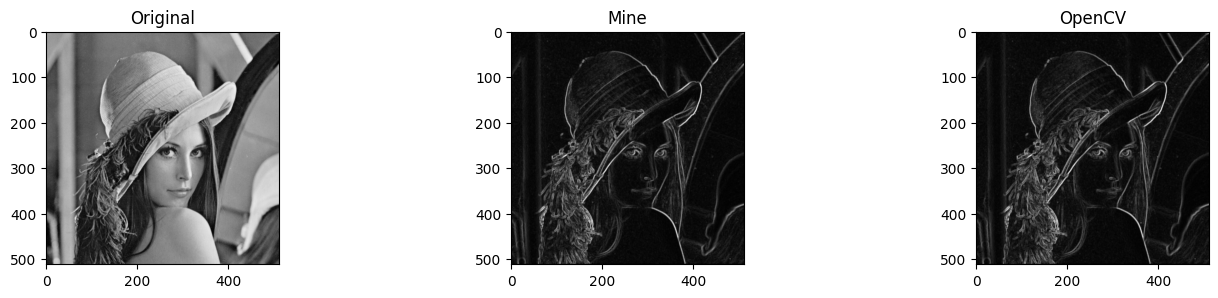

In [14]:
def morphologicalGradient(inputImg, kernel):
    # compute the dilation
    dilation = dilationOperator(inputImg, kernel)
    # compute the erosion
    erosion = erosionOperator(inputImg, kernel)
    # compute the difference between it
    result = dilation - erosion
    return result


myImg = morphologicalGradient(img, kernel)
libImg = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plotImg(img, myImg, libImg)

<h3><b>f. Top - Hat</b></h3>


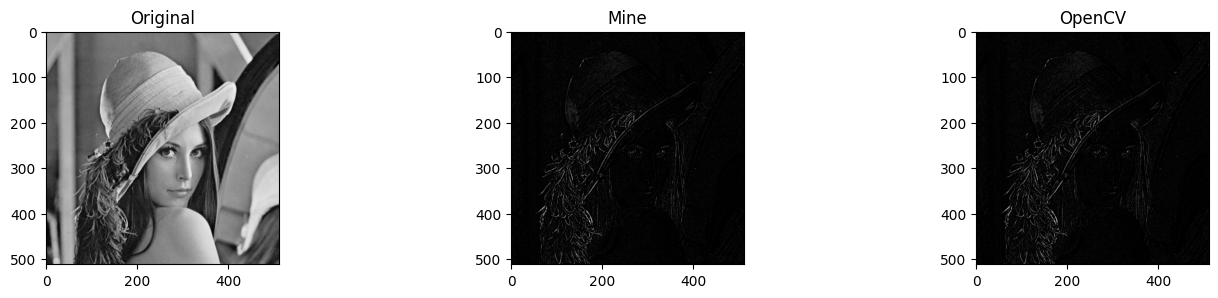

In [15]:
def tophatOperator(inputImg, kernel):
    # compute the opening
    opening = openingOperator(inputImg, kernel)
    # compute the difference
    result = inputImg - opening
    return result


myImg = tophatOperator(img, kernel)
libImg = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plotImg(img, myImg, libImg)


<h3><b>g. Smoothing </b></h3>


In [16]:
def smoothingOperators(inputImg, kernel):
    return closingOperator(openingOperator(inputImg, kernel), kernel)

myImg = smoothingOperators(img, kernel)
openImg = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
libImg = cv.morphologyEx(openImg, cv.MORPH_CLOSE, kernel)

myImg_noise = smoothingOperators(noiseImg, kernel)
openImg = cv.morphologyEx(noiseImg, cv.MORPH_OPEN, kernel)
libImg_noise = cv.morphologyEx(openImg, cv.MORPH_CLOSE, kernel)


plotImg(img, myImg, libImg)
plotImg(noiseImg, myImg_noise, libImg_noise)
